In [1]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

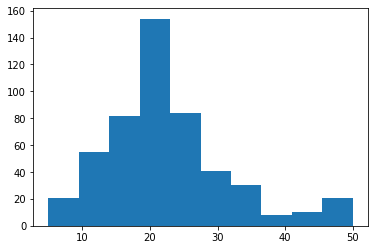

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(data.target)

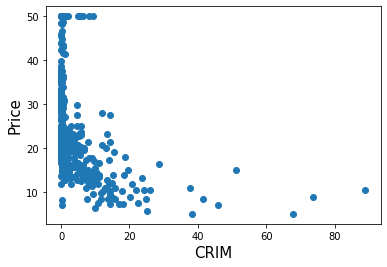

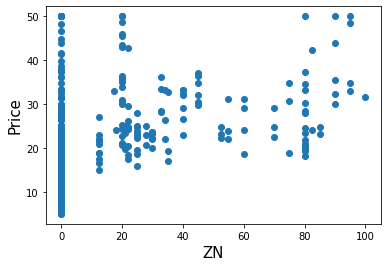

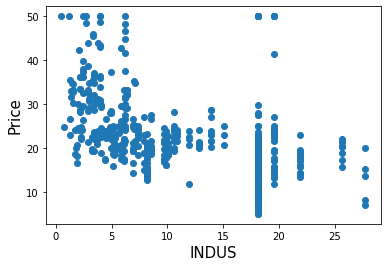

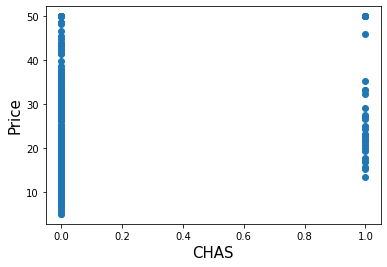

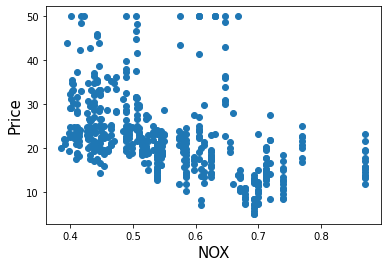

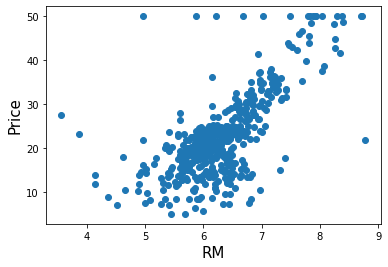

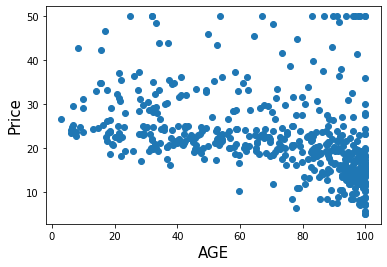

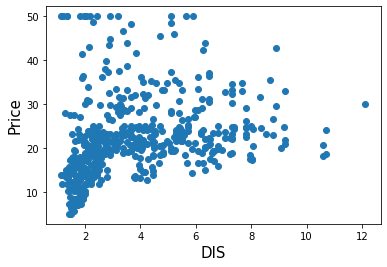

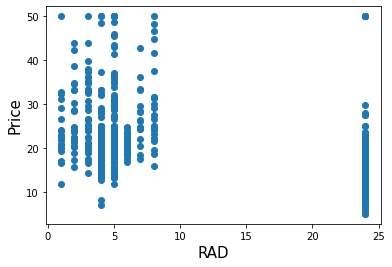

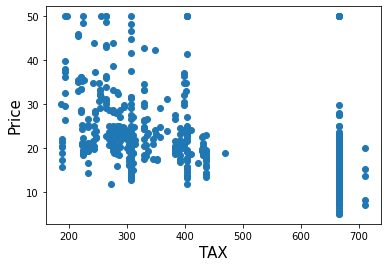

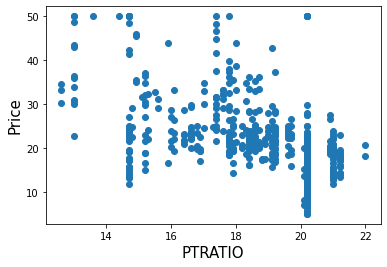

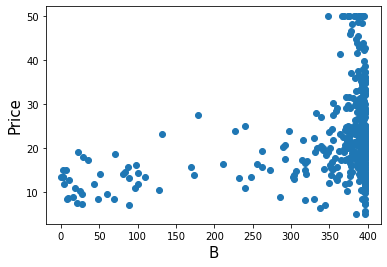

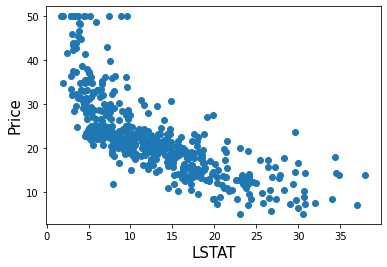

In [ ]:
 for index, feature_name in enumerate(data.feature_names):
    plt.figure()
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.linear_model import LinearRegression
import numpy as np
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 5.242197219193491 


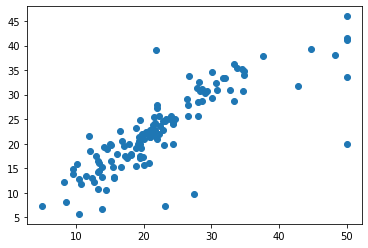

In [ ]:
plt.scatter(expected, predicted)

In [ ]:
clf.coef_, clf.intercept_

(array([-1.03616392e-01,  3.88138413e-02, -3.68090362e-03,  3.20054495e+00,
        -1.61602795e+01,  4.90237166e+00, -1.48767675e-02, -1.44488279e+00,
         2.58733356e-01, -1.18307138e-02, -9.37909371e-01,  9.25791942e-03,
        -3.83747466e-01]), 28.190342559830125)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 4.827711688174772 


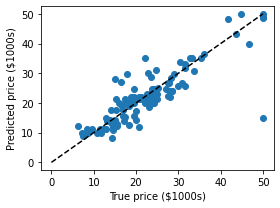

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [ ]:
!pip install pydotplus
import pydotplus
from PIL import Image
from sklearn.tree import export_graphviz
dot_data = export_graphviz(regr, feature_names=data.feature_names,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

In [ ]:
!ls tree.png

tree.png


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
regr1 = DecisionTreeRegressor(max_depth=10)
regr2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=300)
regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)
predicted1 = regr1.predict(X_test)
predicted2 = regr2.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted1 - expected) ** 2)))
print("RMS: %s " % np.sqrt(np.mean((predicted2 - expected) ** 2)))

RMS: 3.5320569282986107 
RMS: 2.349529239400824 


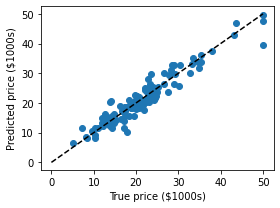

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 300)

# colsample_bytree: 각 트리의 feature sampling 비율로 0.5는 50%의 feature 만 사용
# alpha는 Ridge Regression 조절모수

[10:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


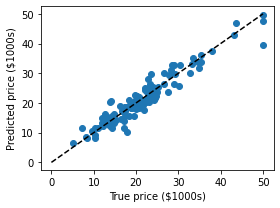

In [ ]:
xg_reg.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [ ]:
predicted = xg_reg.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 2.525705369831141 


In [ ]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor(objectuve='regression', num_leaves = 7, learning_rate = 0.1, n_estimators = 300)

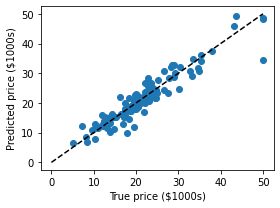

In [ ]:
lgb_reg.fit(X_train, y_train)
predicted = lgb_reg.predict(X_test)
expected = y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [ ]:
predicted = lgb_reg.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 2.8026151548409137 


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
clf = LGBMRegressor()
param_grid = {
    'num_leaves': [5, 6, 7, 8, 9, 31],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'learning rate': [0.1, 0.001, 0.003]
}
gsearch = GridSearchCV(estimator=clf, param_grid=param_grid)
gsearch.fit(X_train, y_train)
 

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'learning rate': [0.1, 0.001, 0.003],
                         'num_leaves'

In [ ]:
gsearch.best_params_

{'colsample_bytree': 1.0, 'learning rate': 0.1, 'num_leaves': 6}

In [ ]:
predicted = gsearch.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 2.942968609880805 
